In [1]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


In [13]:
from re import X
x_train = np.loadtxt('/content/drive/MyDrive/cat_dog_classification_dataset/input_train.csv', delimiter = ',')
x_test = np.loadtxt('/content/drive/MyDrive/cat_dog_classification_dataset/input_test.csv', delimiter = ',')
y_train = np.loadtxt('/content/drive/MyDrive/cat_dog_classification_dataset/labels_train.csv', delimiter = ',')
y_test = np.loadtxt('/content/drive/MyDrive/cat_dog_classification_dataset/labels_test.csv', delimiter = ',')



In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


In [17]:
x_train=x_train.reshape(len(x_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)
x_test=x_test.reshape(len(x_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)

In [21]:
x_train

array([[[[ 37.,  39.,  25.],
         [ 26.,  24.,   9.],
         [ 34.,  25.,  10.],
         ...,
         [ 57.,  44.,  35.],
         [ 61.,  47.,  38.],
         [ 65.,  51.,  42.]],

        [[ 45.,  43.,  28.],
         [ 28.,  25.,   8.],
         [ 52.,  40.,  24.],
         ...,
         [ 54.,  41.,  32.],
         [ 57.,  43.,  34.],
         [ 61.,  47.,  38.]],

        [[ 52.,  45.,  26.],
         [ 32.,  24.,   5.],
         [ 69.,  54.,  35.],
         ...,
         [ 54.,  40.,  29.],
         [ 56.,  42.,  31.],
         [ 59.,  45.,  34.]],

        ...,

        [[ 20.,  39.,   0.],
         [101., 125.,  67.],
         [152., 182., 120.],
         ...,
         [ 46.,  41.,  19.],
         [ 60.,  55.,  33.],
         [ 60.,  55.,  33.]],

        [[ 46.,  65.,   9.],
         [116., 140.,  82.],
         [156., 186., 124.],
         ...,
         [ 64.,  60.,  35.],
         [ 75.,  71.,  46.],
         [ 72.,  68.,  43.]],

        [[ 81., 100.,  44.],
       

In [22]:
x_train=x_train/255.0
x_test=x_test/255.0

In [23]:
x_train

array([[[[0.14509804, 0.15294118, 0.09803922],
         [0.10196078, 0.09411765, 0.03529412],
         [0.13333333, 0.09803922, 0.03921569],
         ...,
         [0.22352941, 0.17254902, 0.1372549 ],
         [0.23921569, 0.18431373, 0.14901961],
         [0.25490196, 0.2       , 0.16470588]],

        [[0.17647059, 0.16862745, 0.10980392],
         [0.10980392, 0.09803922, 0.03137255],
         [0.20392157, 0.15686275, 0.09411765],
         ...,
         [0.21176471, 0.16078431, 0.1254902 ],
         [0.22352941, 0.16862745, 0.13333333],
         [0.23921569, 0.18431373, 0.14901961]],

        [[0.20392157, 0.17647059, 0.10196078],
         [0.1254902 , 0.09411765, 0.01960784],
         [0.27058824, 0.21176471, 0.1372549 ],
         ...,
         [0.21176471, 0.15686275, 0.11372549],
         [0.21960784, 0.16470588, 0.12156863],
         [0.23137255, 0.17647059, 0.13333333]],

        ...,

        [[0.07843137, 0.15294118, 0.        ],
         [0.39607843, 0.49019608, 0.2627451 ]

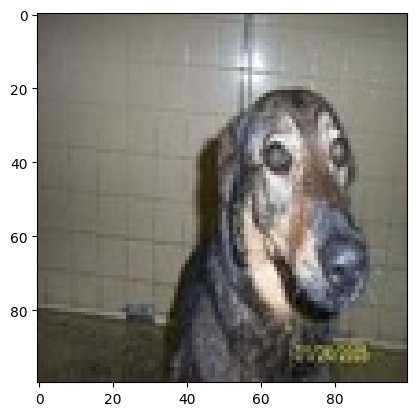

In [24]:
idx=random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

In [27]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [28]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
history=model.fit(x_train,y_train,epochs=5,batch_size=64,verbose=1)

Epoch 1/5
32/32 [==============================] - 20s 637ms/step - loss: 0.2793 - accuracy: 0.8885
Epoch 2/5
32/32 [==============================] - 20s 607ms/step - loss: 0.2928 - accuracy: 0.8790
Epoch 3/5
32/32 [==============================] - 20s 616ms/step - loss: 0.2273 - accuracy: 0.9150
Epoch 4/5
32/32 [==============================] - 21s 640ms/step - loss: 0.2214 - accuracy: 0.9200
Epoch 5/5
32/32 [==============================] - 19s 601ms/step - loss: 0.2109 - accuracy: 0.9155


In [41]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 1s 93ms/step - loss: 0.6407 - accuracy: 0.7000


[0.6406729221343994, 0.699999988079071]

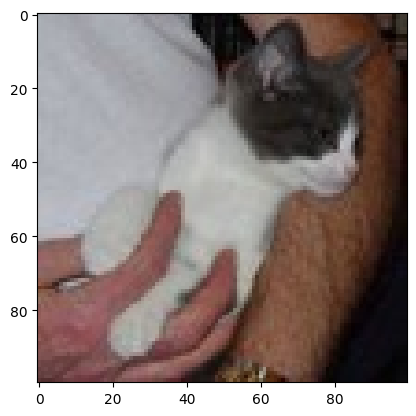

1/1 [==============================] - 0s 23ms/step
[[False]]
our model says it is : dog


In [46]:
idx2=random.randint(0,len(x_test))
plt.imshow(x_test[idx2,:])
plt.show()

y_pred=model.predict(x_test[idx2,:].reshape(1,100,100,3))
y_pred=y_pred>0.5
print(y_pred)
if(y_pred):
  pred='cat'
else:
  pred='dog'

print("our model says it is :",pred)